<a href="https://colab.research.google.com/github/Melquisadec/salario-profissionais-dados/blob/main/Desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise Estatística: Salário de Profissionais de Dados

- Este projeto tem como objetivo aplicar técnicas de estatística descritiva em um conjunto de dados contendo informações sobre profissionais da área de dados ao redor do mundo. A ideia é utilizar ferramentas de análise exploratória e visualização para entender como diferentes fatores impactam o salário desses profissionais.

- A primeira parte do código é importar as bibliotecas de manipulação e as de visualização de dados e após ler esses dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos importar os dados utilizando a função read csv

In [3]:
df = pd.read_csv('salario_profissionais_dados.csv')

## **Etapa 1**
Para verificar as primeiras linhas do data.frame podemos utilizar a função head e no argumento posso especificar a quantidade de linhas para mostrar.

In [6]:
df.head(2)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5


para saber quantas linhas tenho no data.frame e as colunas podemos utilizar a função shape que nos retornar a quantidade de linhas e colunas do data frame

In [8]:
df.shape

(3755, 10)

Uma boa prática de progração é saber os quais são os tipos das variáveis contida no data frame pois pode acontecer de uma variável ter tipos que não condizem com a natureza dos dados, como por exemplo, uma variável que seria do tipo int ou float aparecer com objeto para realizar essa verificação utilizaremos a função info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


Note que que acima temos a variável salário como int porém sabemos que salario pode conter números do tipo float logo o indicado é fazer uma transformação de tipo desta variável

In [11]:

df['salary_in_usd'] = df['salary_in_usd'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   work_year            3755 non-null   int64  
 1   country              3755 non-null   object 
 2   region               3755 non-null   object 
 3   experience_level     3755 non-null   object 
 4   job_title            3755 non-null   object 
 5   salary_in_usd        3755 non-null   float64
 6   employee_residence   3755 non-null   object 
 7   company_location     3755 non-null   object 
 8   company_size         3755 non-null   object 
 9   years_of_experience  3755 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 293.5+ KB


acima transformamos o tipo da variável do tipo int para float com a função astype em seguida conferimos com a função info se a coluna de salário teve o tipo modificada com essa alteração veremos se existe valores nulos nas variáveis para isso utlizamos a função isnull juntamente com a função sum para verificar a soma de valores nulos em cada variável.

In [12]:
df.isnull().sum()

,0
work_year,0
country,0
region,0
experience_level,0
job_title,0
salary_in_usd,0
employee_residence,0
company_location,0
company_size,0
years_of_experience,0


note que não há valores nulos em nenhuma coluna, realizado essa primeira etapas de verificações da qualidade dos dados pode-se seguir para algumas análises descritivas.

## **Etapa 2**
- Na etapa 2 será um overwiew da frequencia e distribuição dos dados por categorias e também verificar:
- Cargos mais comuns
- Nível de experiência
- Tamanho da empresa

In [13]:
df['job_title'].value_counts().head(10)

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
Data Architect,101
Research Scientist,82
Applied Scientist,58
Data Science Manager,58


A função acima retorna os 10 cargos mais comum nesta banco de dados nota-se que o top 1 são engenheiros de dados seguidos de cientista de dados. Podemos normalizar como mostra o código abaixo para transforma-los para percentuais

In [35]:
(df['job_title'].value_counts(normalize=True).head(10) * 100).round(2)


,proportion
job_title,
Data Engineer,27.70
Data Scientist,22.37
Data Analyst,16.30
Machine Learning Engineer,7.70
Analytics Engineer,2.74
Data Architect,2.69
Research Scientist,2.18
Applied Scientist,1.54
Data Science Manager,1.54


A função acima nos retornou o percentual do top 10 por categoria.

Aplicando a mesma função para  os níveis de esperiência assim temos a quantidade total de funcionáirios por nível de experiencia.

In [15]:
df['experience_level'].value_counts()


,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


Nota-se que existe um npumero considerável de sênior  dois mil quinhentos e dezesseis, seguidos de intermediários e iniciante a  executivos como esperado é a menor categoria

In [37]:
(df['experience_level'].value_counts(normalize=True) * 100).round(2)


,proportion
experience_level,
SE,67.00
MI,21.44
EN,8.52
EX,3.04


Acima a represntação percentual das categorias. Como esperado Sênior com 67% e executivo com aproximadamente 3%

In [17]:
df['company_size'].value_counts()


,count
company_size,
M,3153
L,454
S,148


Nota-se que a maioria das empresas são de porte médio (M) seguidos de grande porte(L) e por último empresas de pequeno porte (s) a distribuição percentual pode ser obtido com código abaixo

In [38]:
(df['company_size'].value_counts(normalize=True) * 100).round(2)


,proportion
company_size,
M,83.97
L,12.09
S,3.94


Nota-se que aproximadamente 84% das empresas são médias 12% são grande e aproximadamente 4% são pequenas. Após as verificações da etapa 2 faremos a etapa 3

## **Etapa 3 Estatísticas Descritivas**
Nesta etapa calcularemos as principais medidads de posição e disperção serão abordados neste tópico:
- **Medidas de tendência central:** média, mediana
- **Medidas de dispersão:** desvio padrão, mínimo e máximo
- **Distribuição geral:** através de histogramas
- **Comparações por grupos:** especialmente por nível de experiência (usando boxplots)

In [21]:
print("Média:", round(df['salary_in_usd'].mean(), 2))
print("Mediana:", round(df['salary_in_usd'].median(), 2))
print("Desvio padrão:", round(df['salary_in_usd'].std(), 2))
print("Salário mínimo:", round(df['salary_in_usd'].min(), 2))
print("Salário máximo:", round(df['salary_in_usd'].max(), 2))


Média: 137570.39
Mediana: 135000.0
Desvio padrão: 63055.63
Salário mínimo: 5132.0
Salário máximo: 450000.0


A função acima ja printa todas os valores das principais estatísticas descritivas do conjunto de dados, nos fornecendo uma ideia de geral da posição desses dados note que a média e a mediana desse conjunto estão bem próxima quando a média a mediana e a moda que são as 3 medidas de tendência central são iguais significa que os dados seguem um distribuição normal. Porém so com este comportamento nota-se que os dados possui um comportamento quase normal o histograma pode representar visualmente a distribuição dos dados.

Podemos realizar um dicionário de dados e transformar nossas medidas de tendencia central e dispersão em um data frame para ficar visualmente melhor com o código abaixo

In [22]:
stats = {
    'Estatística': ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo'],
    'Salário (USD)': [
        round(df['salary_in_usd'].mean(), 2),
        round(df['salary_in_usd'].median(), 2),
        round(df['salary_in_usd'].std(), 2),
        round(df['salary_in_usd'].min(), 2),
        round(df['salary_in_usd'].max(), 2)
    ]
}

df_stats = pd.DataFrame(stats)
print(df_stats)

     Estatística  Salário (USD)
0          Média      137570.39
1        Mediana      135000.00
2  Desvio Padrão       63055.63
3         Mínimo        5132.00
4         Máximo      450000.00


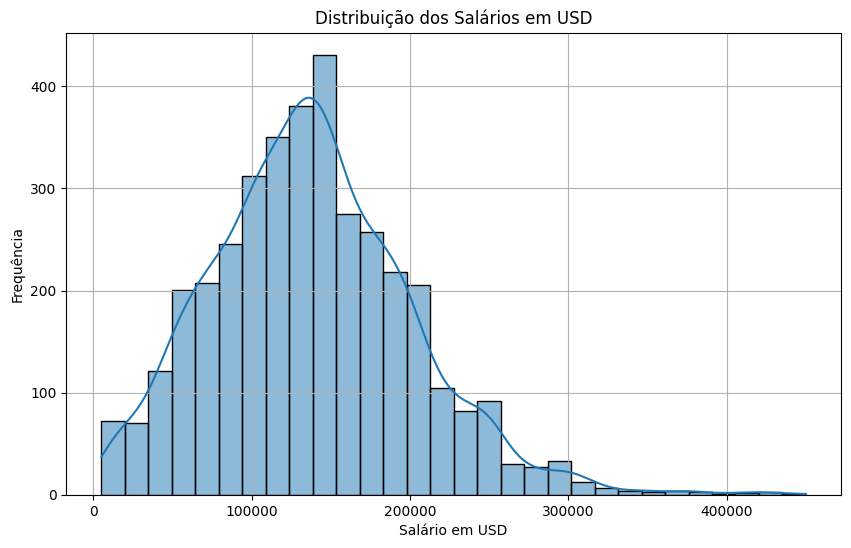

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


O codigo acima que gera o histogram confirma que os dados são bem concentrado em torno da média, ou seja, são bem próximos de uma distribuição normal. Abaixo plotaremos o box plot, este gráfico também nos mostra como o dados esta distribuido.

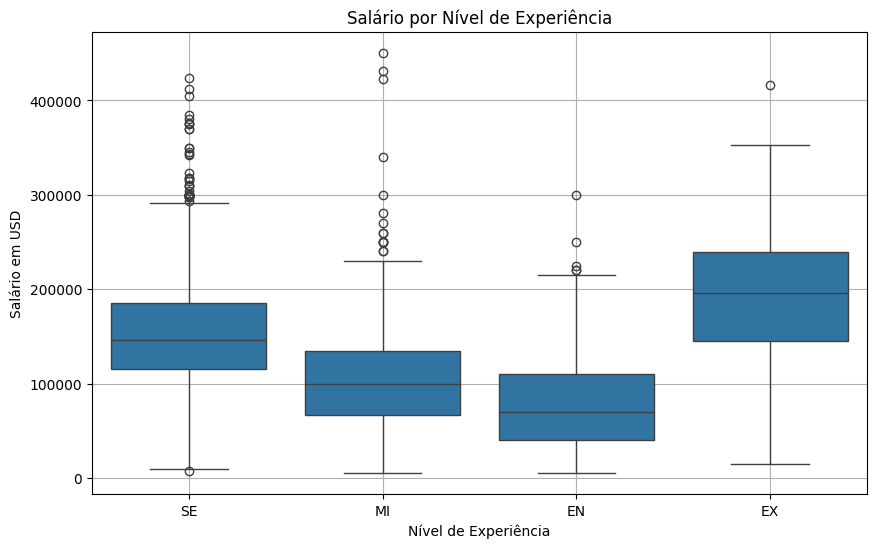

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salário por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.grid(True)
plt.show()


O box plot é um grafico que nos mostra como os dados estão distribuidos e também nos mostra a presença de outliers, ou seja, valores discrepantes na base caso os valores esteja acima do limite superior ou abaixo do limite inferior esses dados são considerados outliers.

Faremos um agrupamento por níveis de experiência e output desejado é quanto maior a experiência espera-se um melhor remuneração, para isto, utilizaremos a função groupby com alguma funçã de agregação neste caso utilizaremos a media.

In [27]:
salario_por_Experiencia = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).round(2)

print("Média salarial por nível de experiência:")
print(salario_por_Experiencia)



Média salarial por nível de experiência:
experience_level
EX    194930.93
SE    153051.07
MI    104525.94
EN     78546.28
Name: salary_in_usd, dtype: float64


In [26]:
salario_por_porte_empresa = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False).round(2)
print("\nMédia salarial por tamanho da empresa:")
print(salario_por_porte_empresa)



Média salarial por tamanho da empresa:
company_size
M    143130.55
L    118300.98
S     78226.68
Name: salary_in_usd, dtype: float64


## **Etapa 04  Comparações por País**
Nesta etapa o objetivo é:

- Verificar os 10 países com as maiores médias salariais
Essas comparações são fundamentais para entender onde estão os maiores salários — seja em termos de função ou localização geográfica.

In [29]:
pais_salario = (
    df.groupby('country')['salary_in_usd']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(10)
)

print(pais_salario)


country
Israel                      423834.00
Malaysia                    200000.00
Puerto Rico                 166000.00
United States of America    152822.01
Canada                      132222.91
China                       125404.00
New Zealand                 125000.00
Bosnia and Herzegovina      120000.00
Ireland                     114943.43
Dominican Republic          110000.00
Name: salary_in_usd, dtype: float64


A função acima retorna o top 10 países com maiores médias salariais, iniciando com Israel no top1 e finalizando em decimo lugar a república dominicana

## Etapa 5 correlação e tendência
Nesta etapa investigaremos se:

- Existe alguma **tendência de aumento salarial com os anos?**
- Quanto maior o tempo de experiência, maior o salário?

In [31]:
correlacao = df[['salary_in_usd', 'work_year', 'years_of_experience']].corr()
print(correlacao)


                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


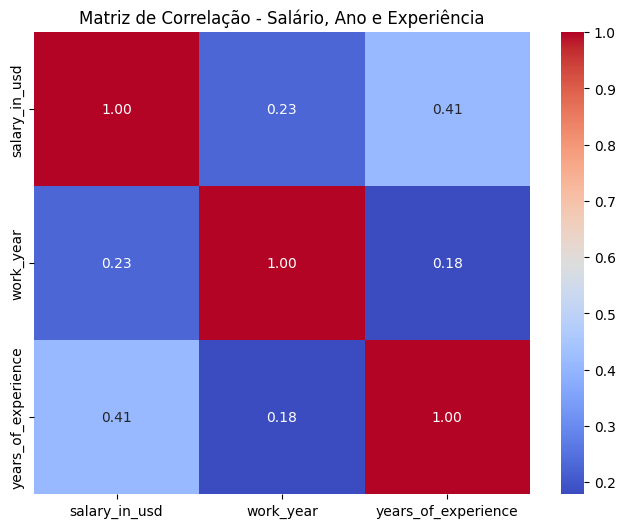

In [32]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Salário, Ano e Experiência')
plt.show()


A matriz de correlação nos mostra o quão correlacionada são as variáveis, note graficamente que a diagonal principal da matriz é 1, pois esta comparando a variável com ela mesmo, outro detalhe é que é uma matriz simétrica ou seja eu posso observar valores acima da diagonal principal ou abaixo pois a correlação de A,B e a mesma de B,A. A correlação varia de -1 a 1 sendo que valores mais proximos de 1 indica correlação fortemente positiva, o efeito desta medida na prática por exemplo poderia dizer que quanto maior a experiencia maior o salário, pois foi o maior coeficiente de correlação.